In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Statistics
from evaluation.classification.statistics import compute_all_size_df, get_precisions
plt.style.use("ggplot")
%matplotlib inline

### --- compare confusion matrix ---

In [2]:
resnet50_not_resize = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/validation_matrix.csv')
resnet50_resize = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_resize/validation_matrix.csv')

In [3]:
resnet50_not_resize_precisions = get_precisions(resnet50_not_resize)
resnet50_resize_precisions = get_precisions(resnet50_resize)

In [4]:
exp_name = ["resnet50_not_resize", "resnet50_resize"]
exp_ap = [resnet50_not_resize_precisions.mean(), resnet50_resize_precisions.mean()]

In [5]:
df = pd.DataFrame({"exp_name": exp_name, "exp_ap": exp_ap})
df

,exp_name,exp_ap
0,resnet50_not_resize,0.877763
1,resnet50_resize,0.884649


In [6]:
df_per_label = pd.DataFrame({"resnet50_not_resize": resnet50_not_resize_precisions, "resnet50_resize": resnet50_resize_precisions})
df_per_label['Name'] = ['Diptera', 'Ephemeridae', 'Ephemeroptera', 'Lepidoptera', 'Plecoptera', 'Trichoptera']

In [7]:
df_per_label

,resnet50_not_resize,resnet50_resize,Name
0,0.933174,0.954654,Diptera
1,0.960784,0.921569,Ephemeridae
2,0.770000,0.765000,Ephemeroptera
3,0.885185,0.874074,Lepidoptera
4,0.813433,0.880597,Plecoptera
5,0.904000,0.912000,Trichoptera


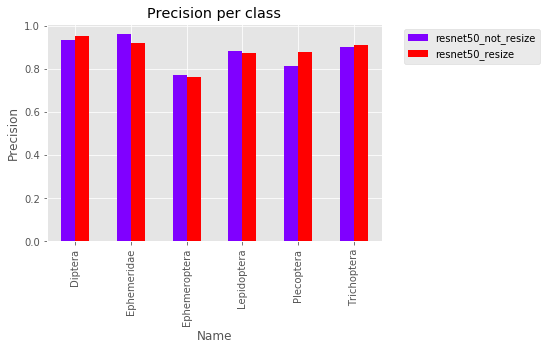

In [8]:
df_per_label.plot(kind="bar", x="Name", y=["resnet50_not_resize", "resnet50_resize"], cmap="rainbow")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Precision")
plt.title("Precision per class")
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_insect_resize/compare_precision_resnet50.png", bbox_inches="tight")

### --- compare accuracy distribution of size ---

In [9]:
resnet50_not_resize = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/each_size_df.csv')
resnet50_resize = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid_resize/each_size_df.csv')
new_resnet50_resize = pd.DataFrame({"Accuracy": resnet50_resize["Accuracy"].values, "Insect_size": resnet50_not_resize["Insect_size"].values})
resnet50_resize = compute_all_size_df(new_resnet50_resize)
resnet50_not_resize = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/classification/ResNet101/resnet50_b20_r45_lr1e-5_crossvalid/all_size_df.csv')

In [10]:
resnet50_not_resize = resnet50_not_resize.drop(resnet50_not_resize.index[[0]])
resnet50_resize = resnet50_resize.drop(resnet50_resize.index[[0]])

In [11]:
all_df = resnet50_not_resize
all_df = all_df.rename(columns={'Accuracy': 'resnet50_not_resize'})
all_df = all_df.assign(resnet50_resize=resnet50_resize["Accuracy"])
all_df

,order,resnet50_not_resize,Insect_size,order.1,resnet50_resize
1,7.0,1.000000,205.833333,7.0,1.000000
2,8.0,0.901961,395.039216,8.0,0.901961
3,9.0,0.716535,770.850394,9.0,0.771654
4,10.0,0.805085,1504.529661,10.0,0.847458
5,11.0,0.875862,2941.368966,11.0,0.879310
6,12.0,0.938710,5934.145161,12.0,0.932258
7,13.0,0.956938,11264.789474,13.0,0.956938
8,14.0,0.961538,22344.653846,14.0,0.935897
9,15.0,0.900000,34865.400000,15.0,0.900000


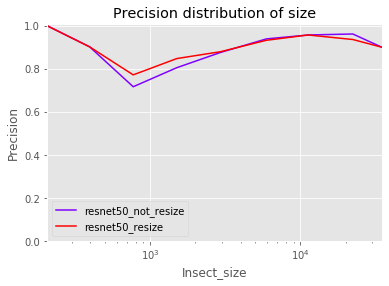

In [12]:
all_df.plot(x="Insect_size", y=["resnet50_not_resize", "resnet50_resize"], logx=True, legend=True, cmap="rainbow")
plt.ylabel("Precision")
plt.title("Precision distribution of size")
plt.ylim(0.0, 1.01)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/classification/compare_insect_resize/compare_precision_distrib_of_size.png", bbox_inches="tight")